In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# change the current to ampere

In [2]:
df = pd.read_csv("D:/IIT Delhi/With_Temperature/N5 Degree/Drive_cycle_test.csv")

In [3]:
df.columns

Index(['Time', 'Current', 'Volatge', 'Capacity', 'Enegry', 'Power'], dtype='object')

In [4]:
df.tail(10)

,Time,Current,Volatge,Capacity,Enegry,Power
18202,18203,-2251.4,2.5527,31.656,91.634,-5747.14878
18203,18204,-2252.2,2.5465,32.282,93.229,-5735.22730
18204,18205,-2252.2,2.5406,32.907,94.820,-5721.93932
18205,18206,-2252.2,2.5344,33.533,96.407,-5707.97568
18206,18207,-2251.4,2.5285,34.158,97.991,-5692.66490
18207,18208,-2252.2,2.5232,34.784,99.570,-5682.75104
18208,18209,-2252.2,2.5173,35.409,101.147,-5669.46306
18209,18210,-2252.2,2.5111,36.035,102.719,-5655.49942
18210,18211,-2252.2,2.5052,36.661,104.288,-5642.21144
18211,18212,-2252.2,2.4993,37.286,105.853,-5628.92346


In [5]:
powe = df.pop('Power')
en = df.pop('Enegry')
capc = df.pop('Capacity')

In [6]:
df.head()

,Time,Current,Volatge
0,1,0.0,4.1046
1,2,0.0,4.1043
2,3,0.0,4.1043
3,4,0.0,4.1040
4,5,0.0,4.1043


# Capacity calculation

In [7]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*1000)

df.loc[:, "Capacity"] = integral

In [8]:
df.head()

,Time,Current,Volatge,Capacity
0,1,0.0,4.1046,0.0
1,2,0.0,4.1043,0.0
2,3,0.0,4.1043,0.0
3,4,0.0,4.1040,0.0
4,5,0.0,4.1043,0.0


In [11]:
df["Capacity"].min()

-2.06302883333339

Text(0.5, 1.0, 'Dataset')

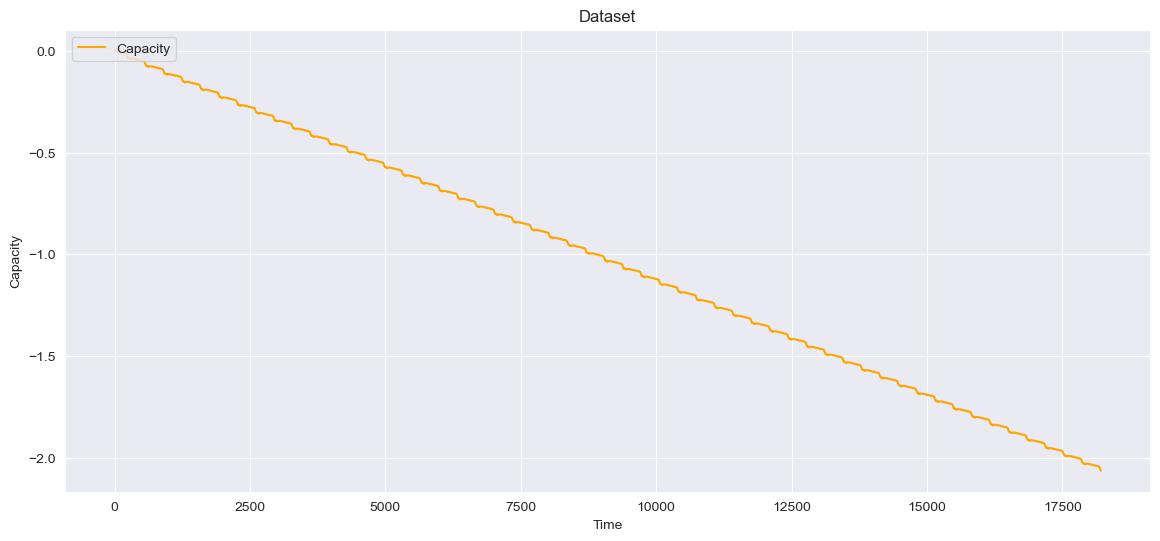

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))
plt.plot(df['Capacity'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Capacity')
plt.xlabel('Time')
plt.legend(["Capacity", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [13]:
df.insert(loc=4,column='Energy',value = df['Capacity']*df['Volatge'])

Text(0.5, 1.0, 'Dataset')

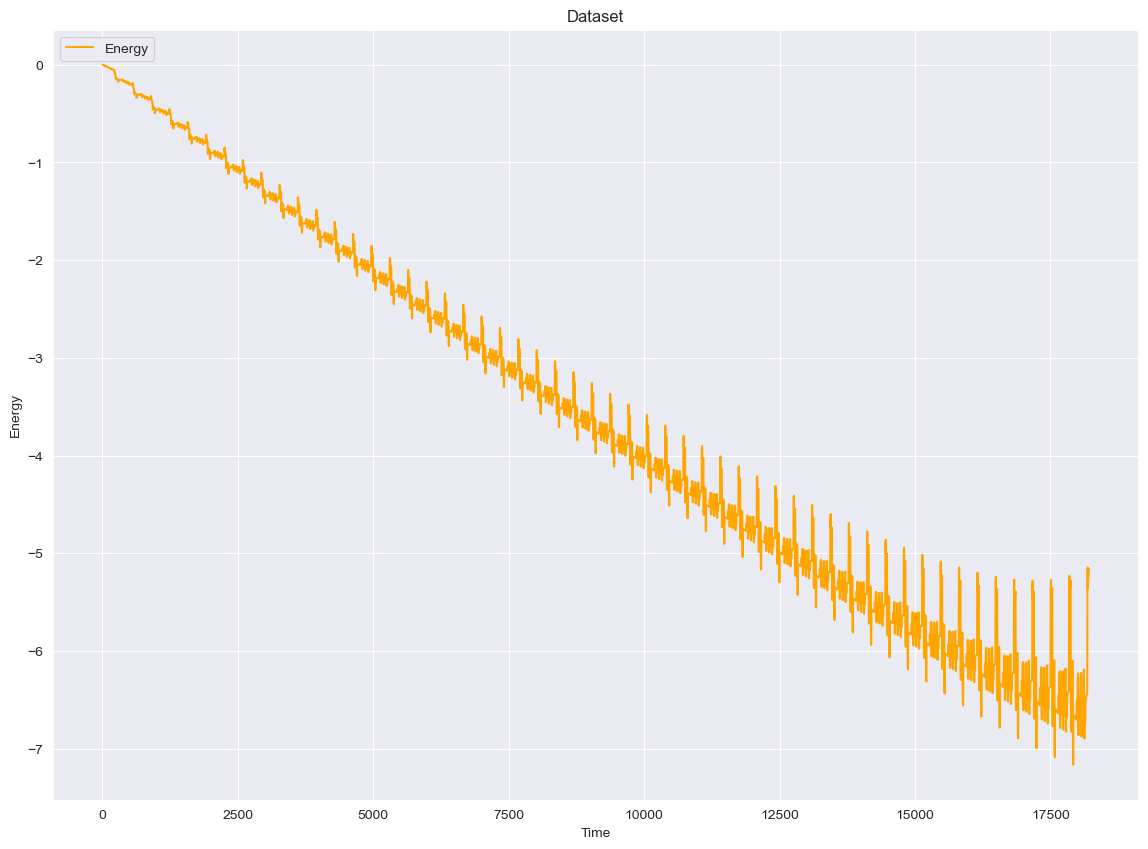

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Energy'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Energy')
plt.xlabel('Time')
plt.legend(["Energy", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [15]:
df.insert(loc=5,column='Power',value = df["Current"]*df['Volatge'])

Text(0.5, 1.0, 'Dataset')

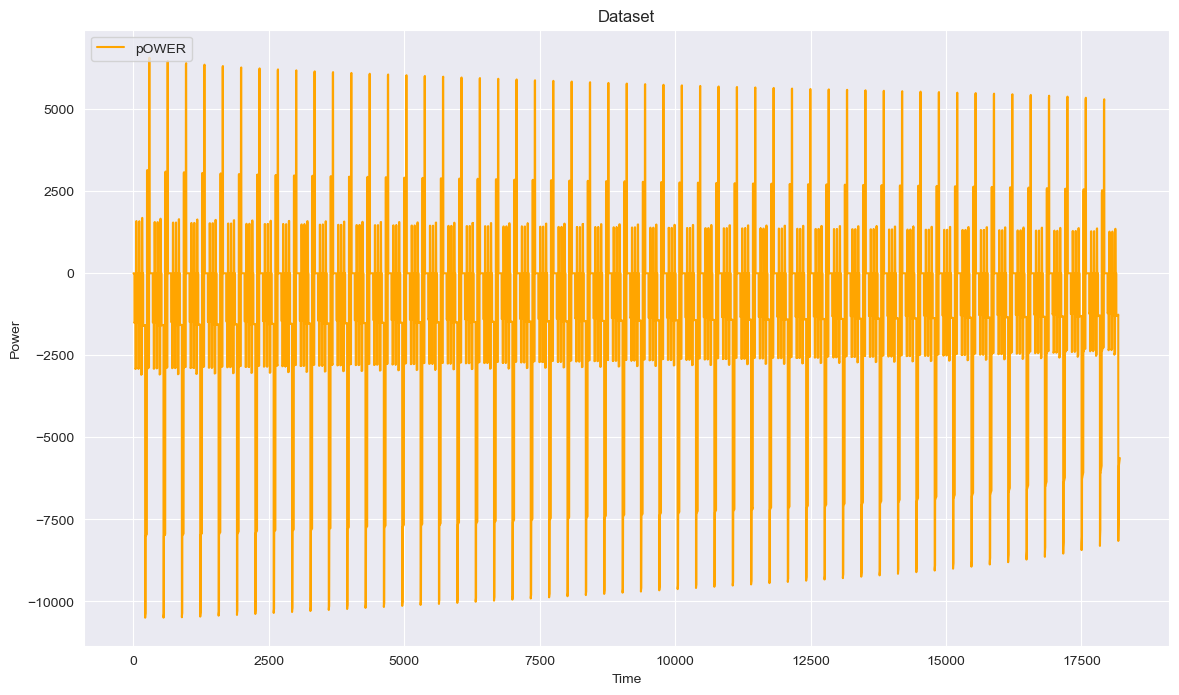

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
plt.plot(df['Power'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend(["pOWER", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [17]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

inte = (cumulative_trapezoid(q,initial=0))/3600

df.loc[:, "Integral_current"] = inte

Text(0.5, 1.0, 'Dataset')

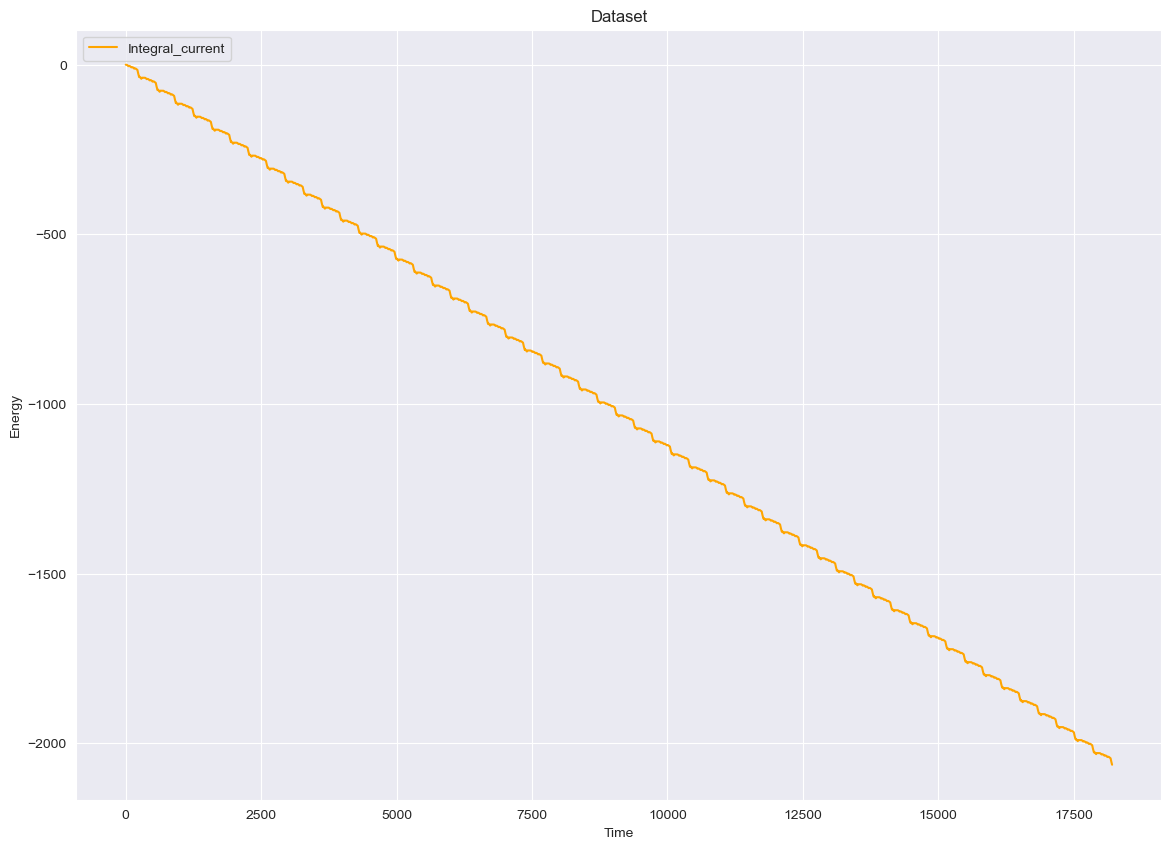

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Integral_current'],color='orange')
# plt.plot(df['Current'],color='green')
plt.ylabel('Energy')
plt.xlabel('Time')
plt.legend(["Integral_current", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [19]:
df.head()

,Time,Current,Volatge,Capacity,Energy,Power,Integral_current
0,1,0.0,4.1046,0.0,0.0,0.0,0.0
1,2,0.0,4.1043,0.0,0.0,0.0,0.0
2,3,0.0,4.1043,0.0,0.0,0.0,0.0
3,4,0.0,4.1040,0.0,0.0,0.0,0.0
4,5,0.0,4.1043,0.0,0.0,0.0,0.0


In [20]:
df.head(20)

,Time,Current,Volatge,Capacity,Energy,Power,Integral_current
0,1,0.0,4.1046,0.000000,0.000000,0.00000,0.000000
1,2,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
2,3,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
3,4,0.0,4.1040,0.000000,0.000000,0.00000,0.000000
4,5,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
5,6,0.0,4.1040,0.000000,0.000000,0.00000,0.000000
6,7,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
7,8,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
8,9,0.0,4.1043,0.000000,0.000000,0.00000,0.000000
9,10,0.0,4.1046,0.000000,0.000000,0.00000,0.000000


In [21]:
df.insert(loc=5,column='Power_with_inte',value = df['Integral_current']*df['Volatge'])

Text(0.5, 1.0, 'Dataset')

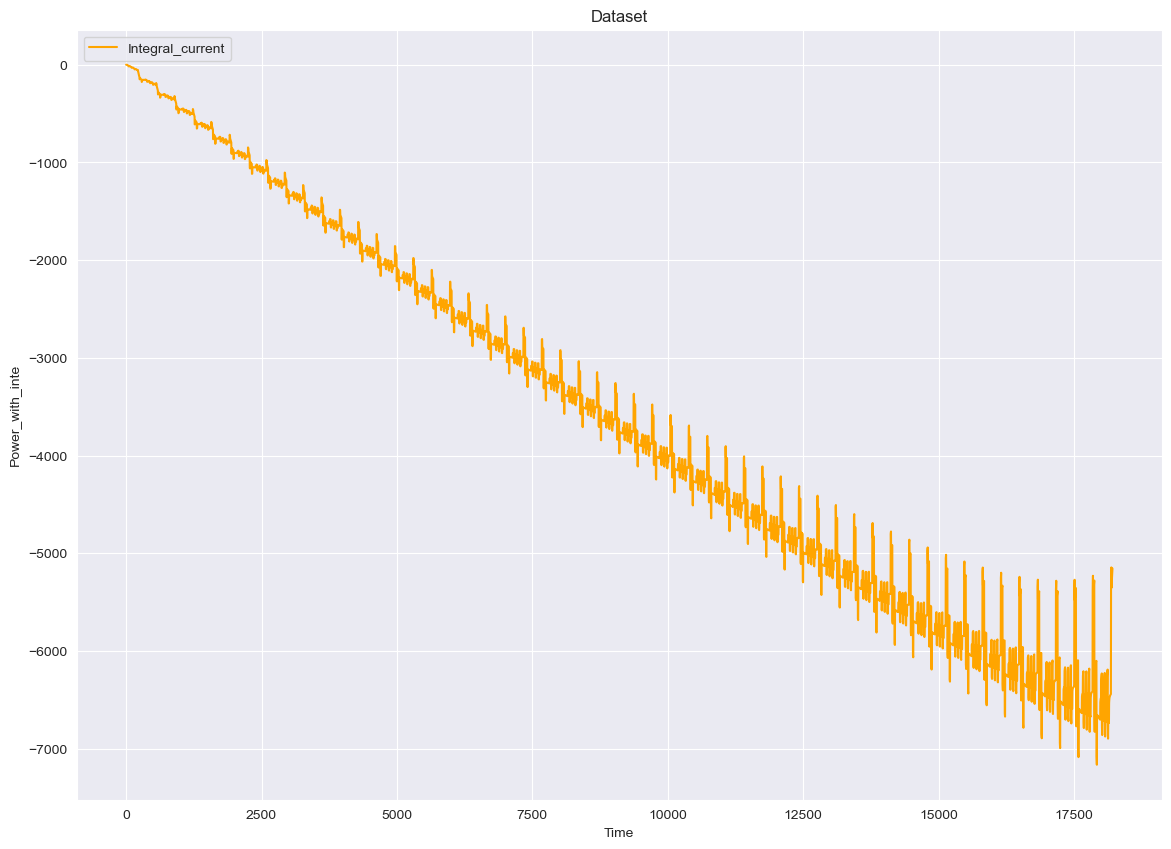

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Power_with_inte'],color='orange')
# plt.plot(df['Current'],color='green')
plt.ylabel('Power_with_inte')
plt.xlabel('Time')
plt.legend(["Integral_current", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [23]:
df.head()

,Time,Current,Volatge,Capacity,Energy,Power_with_inte,Power,Integral_current
0,1,0.0,4.1046,0.0,0.0,0.0,0.0,0.0
1,2,0.0,4.1043,0.0,0.0,0.0,0.0,0.0
2,3,0.0,4.1043,0.0,0.0,0.0,0.0,0.0
3,4,0.0,4.1040,0.0,0.0,0.0,0.0,0.0
4,5,0.0,4.1043,0.0,0.0,0.0,0.0,0.0


CPU times: total: 484 ms
Wall time: 521 ms


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

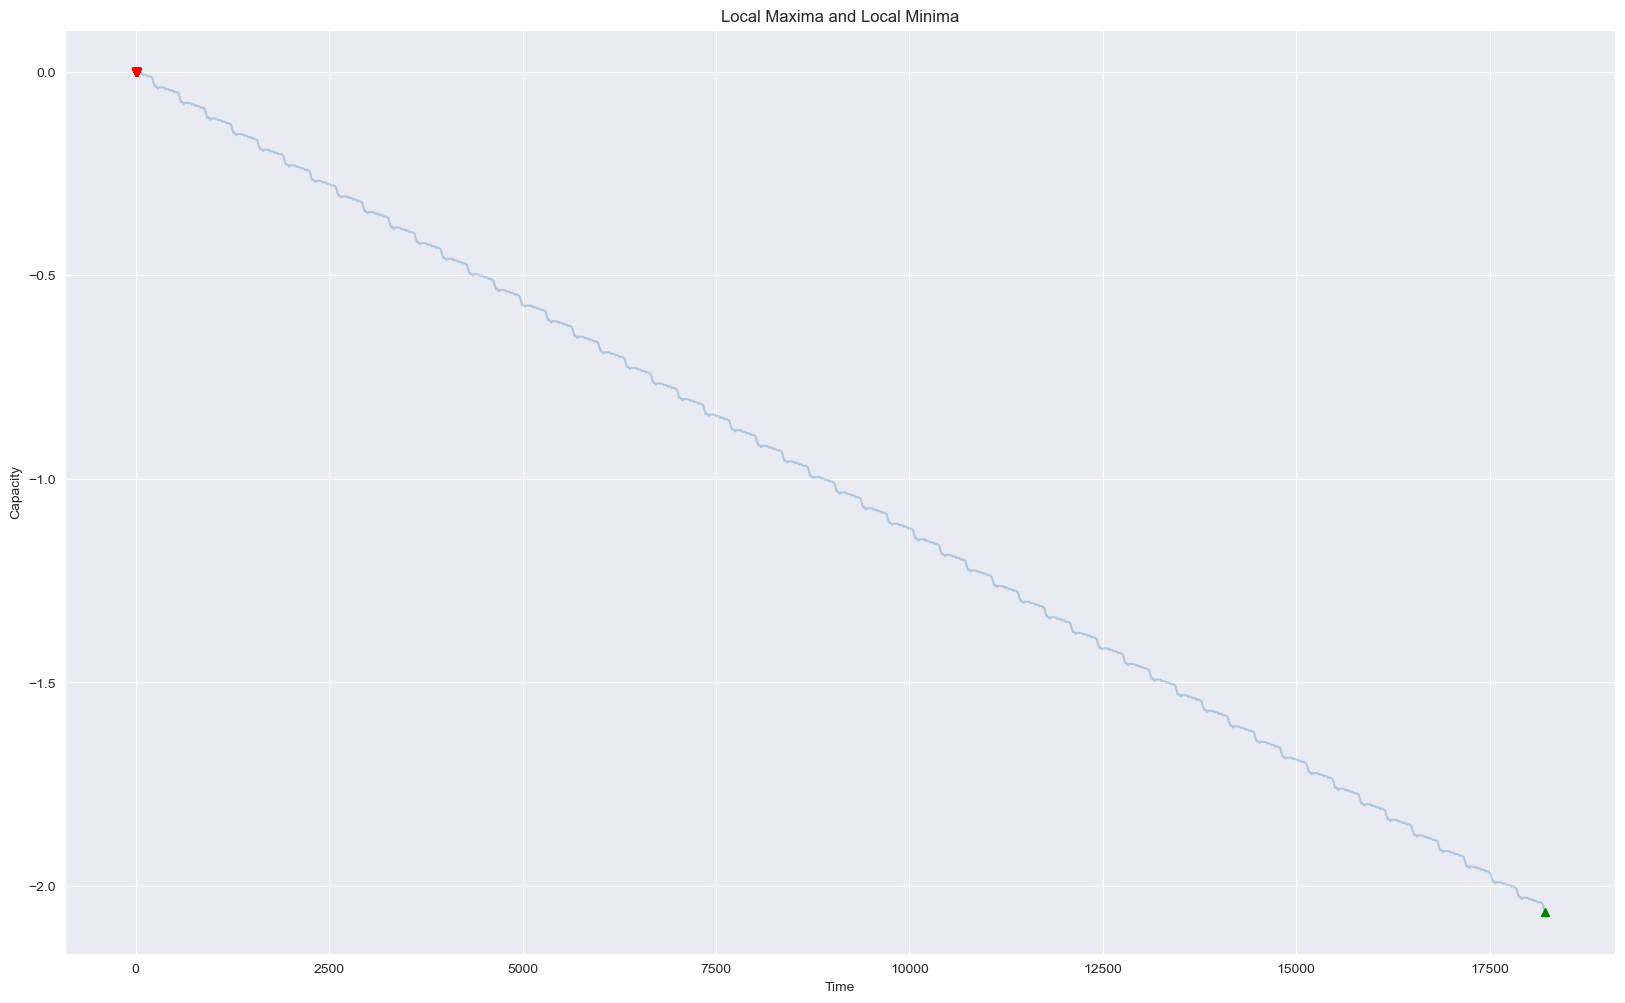

In [24]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=200)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=200)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [25]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [26]:
# print(maximum_point)
print(minimum_point.min())
# print(minimum_point)

-2.06302883333339


In [24]:
df.head()

,Time,Current,Volatge,Capacity,Energy,Power_with_inte,Power,Integral_current
0,1,0.0,4.1046,0.0,0.0,0.0,0.0,0.0
1,2,0.0,4.1043,0.0,0.0,0.0,0.0,0.0
2,3,0.0,4.1043,0.0,0.0,0.0,0.0,0.0
3,4,0.0,4.1040,0.0,0.0,0.0,0.0,0.0
4,5,0.0,4.1043,0.0,0.0,0.0,0.0,0.0


In [27]:
df.insert(loc=4,column='SOC',value = df['Capacity']/-2.06)    # adding SOC 

In [28]:
df.head()

,Time,Current,Volatge,Capacity,SOC,Energy,Power_with_inte,Power,Integral_current
0,1,0.0,4.1046,0.0,-0.0,0.0,0.0,0.0,0.0
1,2,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0
2,3,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0
3,4,0.0,4.1040,0.0,-0.0,0.0,0.0,0.0,0.0
4,5,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0


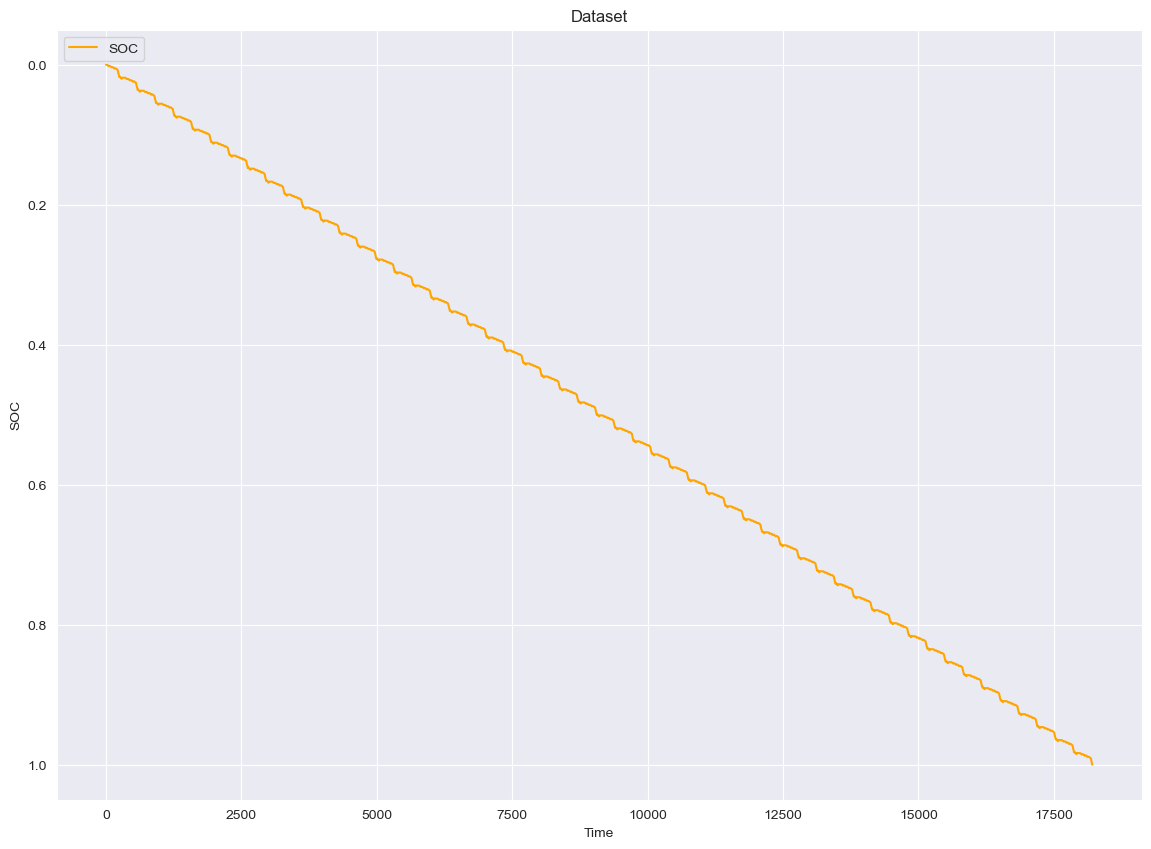

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('SOC')
plt.xlabel('Time')
plt.legend(["SOC"], loc ="upper left")
plt.title('Dataset')
plt.gca().invert_yaxis()   # Inverting the image

Text(0.5, 1.0, 'Dataset')

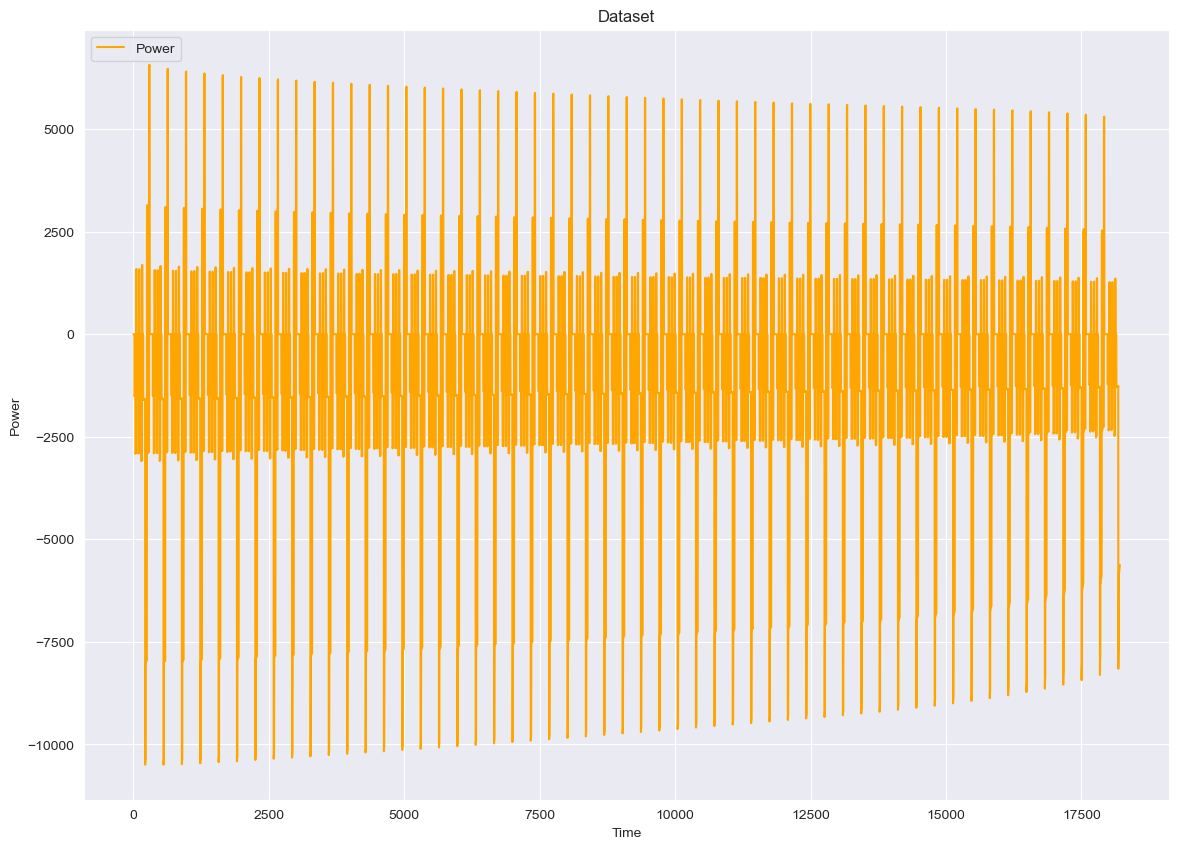

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Power'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend(["Power"], loc ="upper left")
plt.title('Dataset')

In [31]:
timest = df.pop('Time')

In [32]:
# df.insert(loc=5, column='Charge', value = df['Capacity']*3600)  # Adding the column

In [33]:
# new_cols = ["Volatge","Current","Capacity",'SOC','Energy','Power','Power_with_inte','Integral_current']
# df=df[new_cols]

In [34]:
df.rename(columns={'Volatge': 'Voltage'},inplace=True)

In [35]:
# df.insert(loc = 5,column ='Energy',value=df['Capacity']*df["Voltage"]) # do add if needed 

In [36]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['Energy'],color='orange')
# # plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Energy')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [37]:
df.head()

,Current,Voltage,Capacity,SOC,Energy,Power_with_inte,Power,Integral_current
0,0.0,4.1046,0.0,-0.0,0.0,0.0,0.0,0.0
1,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0
2,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0
3,0.0,4.1040,0.0,-0.0,0.0,0.0,0.0,0.0
4,0.0,4.1043,0.0,-0.0,0.0,0.0,0.0,0.0


# Data Spliting

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Voltage','Current','Capacity','SOC','Energy','Power','Power_with_inte','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [39]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['Energy'],color='orange')
# # plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Energy')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [40]:
Y = df.pop('Power_with_inte')
X = df

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [42]:
X_train

,Current,Voltage,Capacity,SOC,Energy,Power,Integral_current
9837,0.666511,0.601527,0.461950,0.538050,0.438192,0.615066,0.461950
8972,0.755492,0.649741,0.512029,0.487971,0.477793,0.702404,0.512029
9687,0.577375,0.574403,0.474382,0.525618,0.458862,0.530898,0.474382
5900,0.577375,0.648566,0.680525,0.319475,0.658313,0.527628,0.680525
14282,0.499778,0.453735,0.218991,0.781009,0.246758,0.467578,0.218991
...,...,...,...,...,...,...,...
16455,0.577375,0.442149,0.103974,0.896026,0.141429,0.536729,0.103974
10120,0.999845,0.690961,0.442083,0.557917,0.390535,0.949042,0.442083
1333,0.666511,0.783811,0.925785,0.074215,0.915211,0.615066,0.925785
16060,0.577375,0.454749,0.124471,0.875529,0.155119,0.536174,0.124471


In [43]:
Y_train

9837     0.438192
8972     0.477793
9687     0.458862
5900     0.658313
14282    0.246758
           ...   
16455    0.141429
10120    0.390535
1333     0.915211
16060    0.155119
13899    0.235124
Name: Power_with_inte, Length: 14569, dtype: float64

In [44]:
# new_model = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_7_Energyesti.h5')

# # Show the model architecture
# new_model.summary()

In [45]:
# new_model.evaluate(X,Y)

# Modeling for Power Estimation

In [46]:
from tensorflow.keras.callbacks import EarlyStopping


callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [47]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [61]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=16, epochs= 100,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/100
911/911 [==============================] - 5s 4ms/step - loss: 0.0216 - rmse: 0.0512 - mae: 0.0216 - mse: 0.0026 - mape: 60.5341 - val_loss: 0.0086 - val_rmse: 0.0113 - val_mae: 0.0086 - val_mse: 1.2673e-04 - val_mape: 3.2360
Epoch 2/100
911/911 [==============================] - 3s 4ms/step - loss: 0.0067 - rmse: 0.0088 - mae: 0.0067 - mse: 7.7428e-05 - mape: 598.6169 - val_loss: 0.0055 - val_rmse: 0.0074 - val_mae: 0.0055 - val_mse: 5.4388e-05 - val_mape: 1.6832
Epoch 3/100
911/911 [==============================] - 4s 4ms/step - loss: 0.0049 - rmse: 0.0066 - mae: 0.0049 - mse: 4.3097e-05 - mape: 107.3014 - val_loss: 0.0038 - val_rmse: 0.0056 - val_mae: 0.0038 - val_mse: 3.1109e-05 - val_mape: 1.0265
Epoch 4/100
911/911 [==============================] - 4s 4ms/step - loss: 0.0040 - rmse: 0.0054 - mae: 0.0040 - mse: 2.9619e-05 - mape: 316.2944 - val_loss: 0.0030 - val_rmse: 0.0044 - val_mae: 0.0030 - val_mse: 1.9591e-05 - val_mape: 1.2509
Epoch 5/100
911/911 [============

911/911 [==============================] - 3s 4ms/step - loss: 5.6107e-04 - rmse: 7.0740e-04 - mae: 5.6107e-04 - mse: 5.0042e-07 - mape: 28.1733 - val_loss: 0.0011 - val_rmse: 0.0011 - val_mae: 0.0011 - val_mse: 1.2125e-06 - val_mape: 0.3489
Epoch 34/100
911/911 [==============================] - 3s 4ms/step - loss: 5.5824e-04 - rmse: 7.0501e-04 - mae: 5.5824e-04 - mse: 4.9704e-07 - mape: 43.9460 - val_loss: 1.5247e-04 - val_rmse: 1.6068e-04 - val_mae: 1.5247e-04 - val_mse: 2.5818e-08 - val_mape: 0.0573
Epoch 35/100
911/911 [==============================] - 3s 4ms/step - loss: 5.5756e-04 - rmse: 7.1735e-04 - mae: 5.5756e-04 - mse: 5.1459e-07 - mape: 9.1644 - val_loss: 6.2900e-04 - val_rmse: 6.3712e-04 - val_mae: 6.2900e-04 - val_mse: 4.0592e-07 - val_mape: 0.2237
Epoch 36/100
911/911 [==============================] - 3s 3ms/step - loss: 4.6375e-04 - rmse: 6.0018e-04 - mae: 4.6375e-04 - mse: 3.6021e-07 - mape: 45.0298 - val_loss: 2.5556e-04 - val_rmse: 3.0260e-04 - val_mae: 2.5556e-04

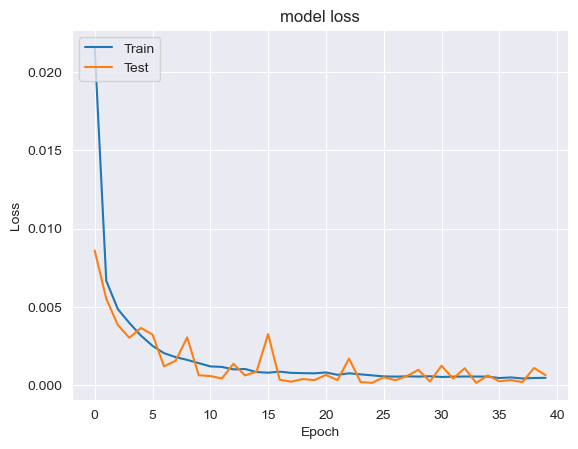

In [62]:
plot_his(history_3)

In [63]:
model_3.evaluate(X_test,Y_test)

114/114 [==============================] - 0s 3ms/step - loss: 6.4889e-04 - rmse: 6.6968e-04 - mae: 6.4889e-04 - mse: 4.4847e-07 - mape: 0.1742


[0.0006488881190307438,
 0.0006696768687106669,
 0.0006488881190307438,
 4.4846709101875604e-07,
 0.17415779829025269]

In [64]:
Y_pred_3 = model_3.predict(X_test)

114/114 [==============================] - 0s 2ms/step


In [65]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                80        
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
